### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [ ]:
import pandas as pd

In [ ]:
import io

# Загрузка данных
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8'))) # преобразование байтового объекта в строковый объект

print(data.head()) # вывести первые 5 строк данных для проверки ("сырые" данные)

print(data.describe()) # вывести статистику по столбцам

print(data.info()) # вывести информацию о типах данных и количестве заполненных значений в каждом столбце

Saving data.csv to data.csv
   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ...  \
0               MAZDA3    i         4D SEDAN I  ...   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                 NEON  SXT           4D SEDAN  ...   
4                FOCUS  ZX3       2D COUPE ZX3  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                      11597.0                    12409.0        NaN      NaN   
1                      11374.0                    12791.0       

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [ ]:
# интерактивный режим построения графиков
%matplotlib inline
import matplotlib.pyplot as plt

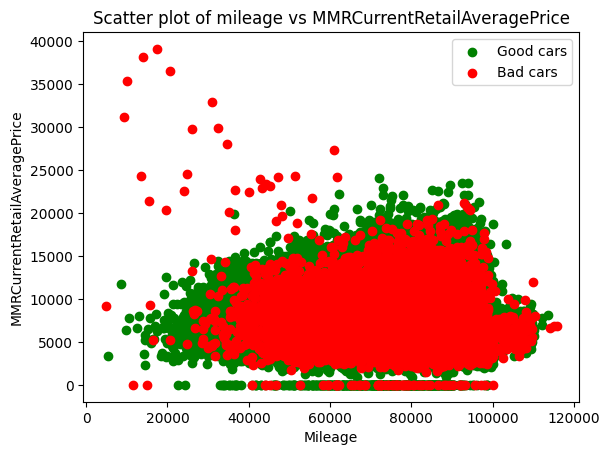

In [ ]:
# создаем фигуру
fig, ax = plt.subplots()

# отбираем данные по автомобилям без недостатков
good_cars = data[data['IsBadBuy'] == 0]
# строим точки для автомобилей без недостатков (зеленый цвет)
ax.scatter(good_cars['VehOdo'], good_cars['MMRCurrentRetailAveragePrice'], c='green', label='Good cars')

# отбираем данные по автомобилям со скрытыми недостатками
bad_cars = data[data['IsBadBuy'] == 1]
# строим точки для автомобилей со скрытыми недостатками (красный цвет)
ax.scatter(bad_cars['VehOdo'], bad_cars['MMRCurrentRetailAveragePrice'], c='red', label='Bad cars')

# добавляем легенду
ax.legend()

# добавляем заголовки и подписи к осям
ax.set_xlabel('Mileage')
ax.set_ylabel('MMRCurrentRetailAveragePrice')
ax.set_title('Scatter plot of mileage vs MMRCurrentRetailAveragePrice')

# отображаем график
plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [ ]:
from sklearn.linear_model import *

# Оставляем только нужные признаки и удаляем строки с пропущенными значениями
features = ['VehOdo', 'MMRCurrentRetailAveragePrice', 'IsBadBuy']
subset_data = data[features].dropna()

# Определяем зависимую и независимые переменные
X = subset_data[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = subset_data['IsBadBuy']

# Создание модели
model = LinearRegression()

# Тренировка модели
model.fit(X, y)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [ ]:
prediction = model.predict(X)

print(prediction)

[0.12473569 0.13585101 0.14563746 ... 0.12108278 0.12349799 0.07867021]


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [ ]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

print(predictionClass)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y, predictionClass))
print(metrics.confusion_matrix(y, predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63724
           1       0.00      0.00      0.00      8944

    accuracy                           0.88     72668
   macro avg       0.44      0.50      0.47     72668
weighted avg       0.77      0.88      0.82     72668

[[63724     0]
 [ 8944     0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Изменение порога может повлиять на точность и полноту классификации, а также на матрицу ошибок. Чем ниже порог, тем больше объектов будет отнесено к классу 1, что может повысить полноту, но понизить точность.

# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [ ]:
from sklearn import tree

# Создаем модель
model2 = tree.DecisionTreeClassifier(max_depth=20)

# Обучаем модель на выбранных признаках и целевой переменной
model2.fit(X[['VehOdo', 'MMRCurrentRetailAveragePrice']], y)

# Предсказываем классы для всех объектов из обучающей выборки
prediction = model2.predict(X[['VehOdo', 'MMRCurrentRetailAveragePrice']])

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [ ]:
proba = model2.predict_proba(X)
prob_isbadbuy = proba[:, 1]

print(prob_isbadbuy)

[0.10682196 0.         0.14189944 ... 0.10682196 0.13253012 0.06210526]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [ ]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

print(metrics.classification_report(y, predictionClass))
print(metrics.confusion_matrix(y, predictionClass))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.97      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

[[63626    98]
 [ 6187  2757]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [ ]:
# разбиваем данные на обучающую и тестовую выборки
dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [ ]:
depths = [1, 5, 10, 15, 20, 25, 30, 35, 40]

for depth in depths:
    model3 = tree.DecisionTreeClassifier(max_depth=depth)
    model3.fit(X, y)
    train_pred = model3.predict(X)
    train_acc = metrics.accuracy_score(y, train_pred)
    print(f'Depth: {depth}, Train Accuracy: {train_acc}')

Depth: 1, Train Accuracy: 0.8769196895469807
Depth: 5, Train Accuracy: 0.877305003577916
Depth: 10, Train Accuracy: 0.8809379644410195
Depth: 15, Train Accuracy: 0.8935982826003193
Depth: 20, Train Accuracy: 0.9134557164088732
Depth: 25, Train Accuracy: 0.9410194308361315
Depth: 30, Train Accuracy: 0.9643722133538835
Depth: 35, Train Accuracy: 0.9812709858534706
Depth: 40, Train Accuracy: 0.9920735399350471


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а правильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [ ]:
import numpy as np
y_pred = model2.predict(X)

# Вычисляем ошибки
errors = np.where(y == y_pred, 1, 1000)

# Вычисляем среднюю ошибку
mean_error = np.mean(errors)
print(mean_error)

87.40274949083503


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



# Проектное задание
Выберите вариант и попросите преподавателя зарезервировать его за вами (вариант может оказаться занят, а задания у всех должны быть разными).
Во всех нижеперечисленных заданиях целевой признак отличается от стандартного. 
По умолчанию для оценки качества используйте функцию cross_val_score (или cross_val_predict и вашу метрику качества), с аргументами cv=KFold(n_splits=10, shuffle=True, random_state=0).  cross_val_score возвращает массив R2-score, для которого нужно вычислить среднее значение.
Код и результаты работы программы нужно показывать на занятии лично преподавателю. 
# Вариант 2
Датасет: Netflix Movies and TV shows. Нужно удалить все строки со значения rating, которые встречаются в базе данных менее 40 раз
Целевой признак: rating
Метрика качества: accuracy
Кросс-валидация: стандартная, cross_val_predict
Для зачета необходимо достичь качества: 0.563


In [ ]:
import io
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

# Загрузка данных
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['netflix_titles.csv'].decode('utf-8')))

# Удаление всех строк со значениями rating, которые встречаются в базе данных менее 40 раз
rating_counts = Counter(df['rating'])
to_drop = [rating for rating, count in rating_counts.items() if count < 40]
df = df[~df['rating'].isin(to_drop)]

# Преобразование категориальных признаков
categorical_columns = ['type', 'country', 'listed_in']
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Преобразование столбца 'duration' в числовой формат
df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Seasons', '').str.replace(' Season', '').str.strip()
df.loc[df['type'] == 'Movie', 'duration'] = pd.to_numeric(df.loc[df['type'] == 'Movie', 'duration'])
df.loc[df['type'] == 'TV Show', 'duration'] = pd.to_numeric(df.loc[df['type'] == 'TV Show', 'duration']) * 24 * 60

# Удаление ненужных признаков
df.drop(['show_id', 'title', 'director', 'cast', 'date_added', 'description'], axis=1, inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop('rating', axis=1)
y = df['rating']

# Обучение модели случайного леса
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X, y)

# Кросс-валидация
cv = KFold(n_splits=10, shuffle=True, random_state=0)
y_pred = cross_val_predict(model, X, y, cv=cv)

# Оценка качества
accuracy = accuracy_score(y, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.54
